In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Random Forest model with bagging ensemble technique

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/breast cancer genomic-clinical dataset.csv")
df.head()

,BRCA1_expression,BRCA2_expression,TP53_mutation,HER2_expression,ER_status,PR_status,Age,Tumor_Size,Histology_Type,Lymph_Node_Status,Stage,Radio_Sensitivity
0,2.523488,3.884129,0,1.743392,0,0,36,4.00,2,5,2,1
1,4.703276,5.774270,0,2.810666,1,1,31,2.76,3,9,2,0
2,4.393514,6.051948,0,2.675832,0,1,51,8.85,2,0,3,0
3,6.891246,3.422858,1,3.398235,1,0,33,8.70,1,9,1,1
4,5.870633,4.032990,0,1.837911,1,0,47,5.41,1,2,1,1


In [4]:
#Seperating features: radio sensitivity in cancer patients
X = df.drop("Radio_Sensitivity", axis=1)
y = df["Radio_Sensitivity"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 1: feature selection filter method: Chi-squared test

X_train_selected_chi2 = SelectKBest(chi2, k=5).fit_transform(X_train, y_train)
X_test_selected_chi2 = SelectKBest(chi2, k=5).fit_transform(X_test, y_test)

chi2_feature_names = X.columns[SelectKBest(chi2, k=5).fit(X_train, y_train).get_support()]

In [6]:
# 2: Feature Importance from Random Forest
initial_rf = RandomForestClassifier(n_estimators=100, random_state=42)
initial_rf.fit(X_train, y_train)
feature_importances = initial_rf.feature_importances_
features = X.columns
important_features = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
important_features = important_features.sort_values(by='Importance', ascending=False)
# Select the top 5 most important features
rf_top_features = important_features['Feature'].head(5).values

In [7]:
#Combine the features selected by Chi-squared and Random Forest
combined_top_features = np.unique(np.concatenate((chi2_feature_names, rf_top_features)))

In [8]:
# Creating new training and testing sets with the combined selected features
X_train_combined = X_train[combined_top_features]
X_test_combined = X_test[combined_top_features]

In [114]:
# Define a Bagging Classifier with Random Forest using selected features
bagging_rf_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42),
    n_estimators=3,  # Train 3 different Random Forest models
    random_state=42,
    n_jobs=-1
)

In [115]:
#Train the Bagging model with selected features
bagging_rf_model.fit(X_train_combined, y_train)


BaggingClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                   n_estimators=1000,
                                                   random_state=42),
                  n_estimators=3, n_jobs=-1, random_state=42)

In [116]:
# Make predictions on the test set
y_pred = bagging_rf_model.predict(X_test_combined)

In [117]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Combined Top Features Selected: {combined_top_features}")
print(f"Bagging Random Forest Model Accuracy with Feature Selection: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Combined Top Features Selected: ['Age' 'BRCA1_expression' 'BRCA2_expression' 'ER_status' 'HER2_expression'
 'TP53_mutation' 'Tumor_Size']
Bagging Random Forest Model Accuracy with Feature Selection: 0.55

Confusion Matrix:
[[ 6 10]
 [ 8 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        16
           1       0.62      0.67      0.64        24

    accuracy                           0.55        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.54      0.55      0.54        40



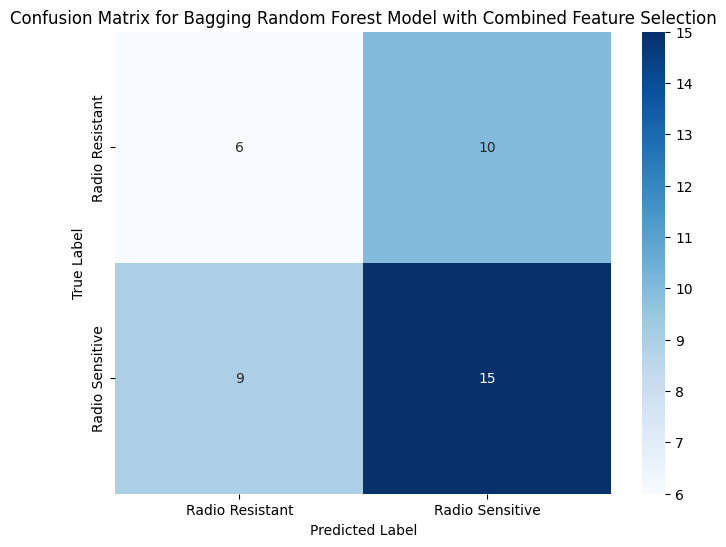

In [14]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Radio Resistant", "Radio Sensitive"],
            yticklabels=["Radio Resistant", "Radio Sensitive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Bagging Random Forest Model with Combined Feature Selection")
plt.show()

random forest model with boosting ensemble technique

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/breast cancer genomic-clinical dataset.csv")
df.head()

,BRCA1_expression,BRCA2_expression,TP53_mutation,HER2_expression,ER_status,PR_status,Age,Tumor_Size,Histology_Type,Lymph_Node_Status,Stage,Radio_Sensitivity
0,2.523488,3.884129,0,1.743392,0,0,36,4.00,2,5,2,1
1,4.703276,5.774270,0,2.810666,1,1,31,2.76,3,9,2,0
2,4.393514,6.051948,0,2.675832,0,1,51,8.85,2,0,3,0
3,6.891246,3.422858,1,3.398235,1,0,33,8.70,1,9,1,1
4,5.870633,4.032990,0,1.837911,1,0,47,5.41,1,2,1,1


In [17]:
X = df.drop("Radio_Sensitivity", axis=1)
y = df["Radio_Sensitivity"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X_train_selected_chi2 = SelectKBest(chi2, k=5).fit_transform(X_train, y_train)
X_test_selected_chi2 = SelectKBest(chi2, k=5).fit_transform(X_test, y_test)

In [20]:
chi2_feature_names = X.columns[SelectKBest(chi2, k=5).fit(X_train, y_train).get_support()]


In [21]:
initial_rf = RandomForestClassifier(n_estimators=100, random_state=42)
initial_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
feature_importances = initial_rf.feature_importances_
features = X.columns

In [23]:
important_features = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
important_features = important_features.sort_values(by='Importance', ascending=False)

In [24]:
rf_top_features = important_features['Feature'].head(5).values


In [25]:
combined_top_features = np.unique(np.concatenate((chi2_feature_names, rf_top_features)))


In [26]:
X_train_combined = X_train[combined_top_features]
X_test_combined = X_test[combined_top_features]

In [134]:
gb_model = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.1, max_depth=10, random_state=42)


In [135]:
gb_model.fit(X_train_combined, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=2000, random_state=42)

In [136]:
y_pred = gb_model.predict(X_test_combined)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Combined Top Features Selected: {combined_top_features}")
print(f"Gradient Boosting Model Accuracy with Feature Selection: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Combined Top Features Selected: ['Age' 'BRCA1_expression' 'BRCA2_expression' 'ER_status' 'HER2_expression'
 'TP53_mutation' 'Tumor_Size']
Gradient Boosting Model Accuracy with Feature Selection: 0.70

Confusion Matrix:
[[10  6]
 [ 6 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.75      0.75      0.75        24

    accuracy                           0.70        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.70      0.70      0.70        40



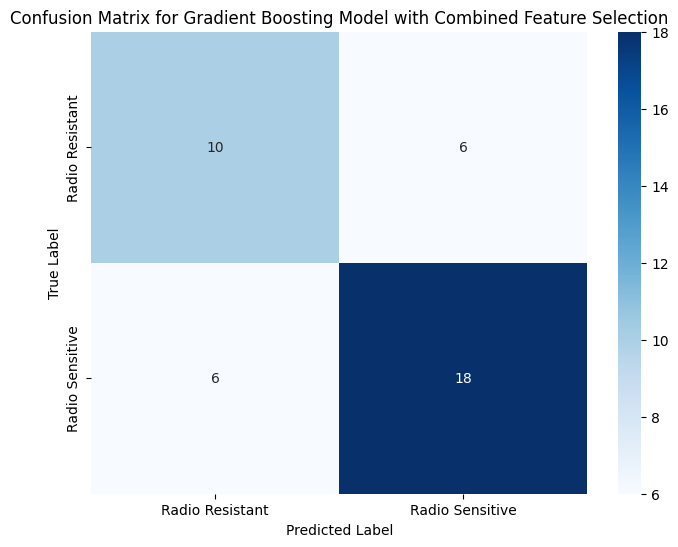

In [138]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Radio Resistant", "Radio Sensitive"],
            yticklabels=["Radio Resistant", "Radio Sensitive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gradient Boosting Model with Combined Feature Selection")
plt.show()